In [52]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [53]:
df = pd.read_csv('Nutrition__Physical_Activity__and_Obesity_-_Behavioral_Risk_Factor_Surveillance_System.csv')

In [10]:
df

,YearStart,YearEnd,LocationAbbr,LocationDesc,Datasource,Class,Topic,Question,Data_Value_Unit,Data_Value_Type,...,GeoLocation,ClassID,TopicID,QuestionID,DataValueTypeID,LocationID,StratificationCategory1,Stratification1,StratificationCategoryId1,StratificationID1
0,2011,2011,AL,Alabama,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,"(32.84057112200048, -86.63186076199969)",OWS,OWS1,Q036,VALUE,1,Total,Total,OVR,OVERALL
1,2011,2011,AL,Alabama,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,"(32.84057112200048, -86.63186076199969)",OWS,OWS1,Q036,VALUE,1,Gender,Male,GEN,MALE
2,2011,2011,AL,Alabama,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,"(32.84057112200048, -86.63186076199969)",OWS,OWS1,Q036,VALUE,1,Gender,Female,GEN,FEMALE
3,2011,2011,AL,Alabama,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,"(32.84057112200048, -86.63186076199969)",OWS,OWS1,Q036,VALUE,1,Education,Less than high school,EDU,EDUHS
4,2011,2011,AL,Alabama,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,"(32.84057112200048, -86.63186076199969)",OWS,OWS1,Q036,VALUE,1,Education,High school graduate,EDU,EDUHSGRAD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53387,2016,2016,VI,Virgin Islands,Behavioral Risk Factor Surveillance System,Physical Activity,Physical Activity - Behavior,Percent of adults who engage in no leisure-tim...,NaN,Value,...,"(18.335765, -64.896335)",PA,PA1,Q047,VALUE,78,Race/Ethnicity,Asian,RACE,RACEASN
53388,2016,2016,VI,Virgin Islands,Behavioral Risk Factor Surveillance System,Physical Activity,Physical Activity - Behavior,Percent of adults who engage in no leisure-tim...,NaN,Value,...,"(18.335765, -64.896335)",PA,PA1,Q047,VALUE,78,Race/Ethnicity,Hawaiian/Pacific Islander,RACE,RACEHPI
53389,2016,2016,VI,Virgin Islands,Behavioral Risk Factor Surveillance System,Physical Activity,Physical Activity - Behavior,Percent of adults who engage in no leisure-tim...,NaN,Value,...,"(18.335765, -64.896335)",PA,PA1,Q047,VALUE,78,Race/Ethnicity,American Indian/Alaska Native,RACE,RACENAA
53390,2016,2016,VI,Virgin Islands,Behavioral Risk Factor Surveillance System,Physical Activity,Physical Activity - Behavior,Percent of adults who engage in no leisure-tim...,NaN,Value,...,"(18.335765, -64.896335)",PA,PA1,Q047,VALUE,78,Race/Ethnicity,2 or more races,RACE,RACE2PLUS


In [54]:
print('The dataframe has\n{} rows and\n{} columns'.format(df.shape[0],df.shape[1]))

The dataframe has
53392 rows and
33 columns


In [55]:
# First making a copy of the dataframe
df_copy = df.copy()

In [56]:
# Dropping columns
df.drop(['LocationAbbr','LocationDesc','GeoLocation','Class','Topic','Question'],axis=1,inplace=True)

In [57]:
# Lets look into first two columns, first says start year and second says end year
# lets find instances where start is not equal to end.
df[df['YearStart']!=df['YearEnd']]

,YearStart,YearEnd,Datasource,Data_Value_Unit,Data_Value_Type,Data_Value,Data_Value_Alt,Data_Value_Footnote_Symbol,Data_Value_Footnote,Low_Confidence_Limit,...,Race/Ethnicity,ClassID,TopicID,QuestionID,DataValueTypeID,LocationID,StratificationCategory1,Stratification1,StratificationCategoryId1,StratificationID1


In [58]:
df.rename(columns={'YearStart':'Year'},inplace=True)
df.drop(['YearEnd'],axis=1,inplace=True)

In [59]:
df.Datasource.value_counts()

Behavioral Risk Factor Surveillance System    53392
Name: Datasource, dtype: int64

In [60]:
# Since there is a singular value in each rows the column has no need
df.drop(['Datasource'],axis=1,inplace=True)

In [61]:
df.Data_Value_Unit.notnull().sum()

0

In [62]:
# Each row of Data_Value_Unit column is empty so the whole column has no need
df.drop(['Data_Value_Unit'],axis=1,inplace=True)

In [63]:
df.Data_Value_Type.value_counts()

Value    53392
Name: Data_Value_Type, dtype: int64

In [64]:
# Since there is a singular value in each rows the column has no need
df.drop(['Data_Value_Type'],axis=1,inplace=True)

In [65]:
df

,Year,Data_Value,Data_Value_Alt,Data_Value_Footnote_Symbol,Data_Value_Footnote,Low_Confidence_Limit,High_Confidence_Limit,Sample_Size,Total,Age(years),...,Race/Ethnicity,ClassID,TopicID,QuestionID,DataValueTypeID,LocationID,StratificationCategory1,Stratification1,StratificationCategoryId1,StratificationID1
0,2011,32.0,32.0,NaN,NaN,30.5,33.5,7304.0,Total,NaN,...,NaN,OWS,OWS1,Q036,VALUE,1,Total,Total,OVR,OVERALL
1,2011,32.3,32.3,NaN,NaN,29.9,34.7,2581.0,NaN,NaN,...,NaN,OWS,OWS1,Q036,VALUE,1,Gender,Male,GEN,MALE
2,2011,31.8,31.8,NaN,NaN,30.0,33.6,4723.0,NaN,NaN,...,NaN,OWS,OWS1,Q036,VALUE,1,Gender,Female,GEN,FEMALE
3,2011,33.6,33.6,NaN,NaN,29.9,37.6,1153.0,NaN,NaN,...,NaN,OWS,OWS1,Q036,VALUE,1,Education,Less than high school,EDU,EDUHS
4,2011,32.8,32.8,NaN,NaN,30.2,35.6,2402.0,NaN,NaN,...,NaN,OWS,OWS1,Q036,VALUE,1,Education,High school graduate,EDU,EDUHSGRAD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53387,2016,NaN,NaN,~,Data not available because sample size is insu...,NaN,NaN,NaN,NaN,NaN,...,Asian,PA,PA1,Q047,VALUE,78,Race/Ethnicity,Asian,RACE,RACEASN
53388,2016,NaN,NaN,~,Data not available because sample size is insu...,NaN,NaN,NaN,NaN,NaN,...,Hawaiian/Pacific Islander,PA,PA1,Q047,VALUE,78,Race/Ethnicity,Hawaiian/Pacific Islander,RACE,RACEHPI
53389,2016,NaN,NaN,~,Data not available because sample size is insu...,NaN,NaN,NaN,NaN,NaN,...,American Indian/Alaska Native,PA,PA1,Q047,VALUE,78,Race/Ethnicity,American Indian/Alaska Native,RACE,RACENAA
53390,2016,NaN,NaN,~,Data not available because sample size is insu...,NaN,NaN,NaN,NaN,NaN,...,2 or more races,PA,PA1,Q047,VALUE,78,Race/Ethnicity,2 or more races,RACE,RACE2PLUS


In [66]:
df.Data_Value_Footnote_Symbol.value_counts()

~    5046
Name: Data_Value_Footnote_Symbol, dtype: int64

In [67]:
df.Data_Value_Footnote_Symbol.isnull().sum()

48346

In [68]:
df['Data_Value'][df['Data_Value_Footnote_Symbol']=='~'].isnull().sum()

5046

In [69]:
df.Data_Value_Footnote.value_counts()

Data not available because sample size is insufficient.                                                                                                   4624
Data not available because sample size is insufficient.  If data only missing for the confidence interval, the confidence interval was not calculated.     422
Name: Data_Value_Footnote, dtype: int64

In [70]:
# Dropping the rows with ~ value in Data_Value_Footote_Symbol
df.drop(df[df['Data_Value_Footnote_Symbol'] == '~'].index,inplace=True)

In [71]:
# Now the whole columns Data_Value_Footnote_Symbol and Data_Value_Footnote are NaN values we can drop these columns
df.drop(['Data_Value_Footnote_Symbol','Data_Value_Footnote'],axis=1,inplace=True)

In [72]:
df.DataValueTypeID.value_counts()

VALUE    48346
Name: DataValueTypeID, dtype: int64

In [73]:
# Dropping the DataValueTypeID column since it contains single value in all rows
df.drop(['DataValueTypeID'],axis=1,inplace=True)

In [74]:
df

,Year,Data_Value,Data_Value_Alt,Low_Confidence_Limit,High_Confidence_Limit,Sample_Size,Total,Age(years),Education,Gender,Income,Race/Ethnicity,ClassID,TopicID,QuestionID,LocationID,StratificationCategory1,Stratification1,StratificationCategoryId1,StratificationID1
0,2011,32.0,32.0,30.5,33.5,7304.0,Total,NaN,NaN,NaN,NaN,NaN,OWS,OWS1,Q036,1,Total,Total,OVR,OVERALL
1,2011,32.3,32.3,29.9,34.7,2581.0,NaN,NaN,NaN,Male,NaN,NaN,OWS,OWS1,Q036,1,Gender,Male,GEN,MALE
2,2011,31.8,31.8,30.0,33.6,4723.0,NaN,NaN,NaN,Female,NaN,NaN,OWS,OWS1,Q036,1,Gender,Female,GEN,FEMALE
3,2011,33.6,33.6,29.9,37.6,1153.0,NaN,NaN,Less than high school,NaN,NaN,NaN,OWS,OWS1,Q036,1,Education,Less than high school,EDU,EDUHS
4,2011,32.8,32.8,30.2,35.6,2402.0,NaN,NaN,High school graduate,NaN,NaN,NaN,OWS,OWS1,Q036,1,Education,High school graduate,EDU,EDUHSGRAD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53382,2016,13.3,13.3,8.0,21.2,212.0,NaN,NaN,NaN,NaN,"$75,000 or greater",NaN,PA,PA1,Q047,78,Income,"$75,000 or greater",INC,INC75PLUS
53383,2016,25.3,25.3,16.4,37.0,137.0,NaN,NaN,NaN,NaN,Data not reported,NaN,PA,PA1,Q047,78,Income,Data not reported,INC,INCNR
53384,2016,18.3,18.3,10.8,29.2,154.0,NaN,NaN,NaN,NaN,NaN,Non-Hispanic White,PA,PA1,Q047,78,Race/Ethnicity,Non-Hispanic White,RACE,RACEWHT
53385,2016,24.1,24.1,19.9,28.9,820.0,NaN,NaN,NaN,NaN,NaN,Non-Hispanic Black,PA,PA1,Q047,78,Race/Ethnicity,Non-Hispanic Black,RACE,RACEBLK


In [75]:
# Dropping the unnecessary column
df.drop(['StratificationCategory1','Stratification1'],axis=1,inplace=True)
df

,Year,Data_Value,Data_Value_Alt,Low_Confidence_Limit,High_Confidence_Limit,Sample_Size,Total,Age(years),Education,Gender,Income,Race/Ethnicity,ClassID,TopicID,QuestionID,LocationID,StratificationCategoryId1,StratificationID1
0,2011,32.0,32.0,30.5,33.5,7304.0,Total,NaN,NaN,NaN,NaN,NaN,OWS,OWS1,Q036,1,OVR,OVERALL
1,2011,32.3,32.3,29.9,34.7,2581.0,NaN,NaN,NaN,Male,NaN,NaN,OWS,OWS1,Q036,1,GEN,MALE
2,2011,31.8,31.8,30.0,33.6,4723.0,NaN,NaN,NaN,Female,NaN,NaN,OWS,OWS1,Q036,1,GEN,FEMALE
3,2011,33.6,33.6,29.9,37.6,1153.0,NaN,NaN,Less than high school,NaN,NaN,NaN,OWS,OWS1,Q036,1,EDU,EDUHS
4,2011,32.8,32.8,30.2,35.6,2402.0,NaN,NaN,High school graduate,NaN,NaN,NaN,OWS,OWS1,Q036,1,EDU,EDUHSGRAD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53382,2016,13.3,13.3,8.0,21.2,212.0,NaN,NaN,NaN,NaN,"$75,000 or greater",NaN,PA,PA1,Q047,78,INC,INC75PLUS
53383,2016,25.3,25.3,16.4,37.0,137.0,NaN,NaN,NaN,NaN,Data not reported,NaN,PA,PA1,Q047,78,INC,INCNR
53384,2016,18.3,18.3,10.8,29.2,154.0,NaN,NaN,NaN,NaN,NaN,Non-Hispanic White,PA,PA1,Q047,78,RACE,RACEWHT
53385,2016,24.1,24.1,19.9,28.9,820.0,NaN,NaN,NaN,NaN,NaN,Non-Hispanic Black,PA,PA1,Q047,78,RACE,RACEBLK


In [76]:
df.Total.value_counts()

Total    1907
Name: Total, dtype: int64

In [77]:
df.StratificationCategoryId1.value_counts()

INC      13349
AGEYR    11438
RACE     10210
EDU       7628
GEN       3814
OVR       1907
Name: StratificationCategoryId1, dtype: int64

In [78]:
df.drop(['Total','Age(years)','Education','Gender','Income','Race/Ethnicity'],axis=1,inplace=True)
df


,Year,Data_Value,Data_Value_Alt,Low_Confidence_Limit,High_Confidence_Limit,Sample_Size,ClassID,TopicID,QuestionID,LocationID,StratificationCategoryId1,StratificationID1
0,2011,32.0,32.0,30.5,33.5,7304.0,OWS,OWS1,Q036,1,OVR,OVERALL
1,2011,32.3,32.3,29.9,34.7,2581.0,OWS,OWS1,Q036,1,GEN,MALE
2,2011,31.8,31.8,30.0,33.6,4723.0,OWS,OWS1,Q036,1,GEN,FEMALE
3,2011,33.6,33.6,29.9,37.6,1153.0,OWS,OWS1,Q036,1,EDU,EDUHS
4,2011,32.8,32.8,30.2,35.6,2402.0,OWS,OWS1,Q036,1,EDU,EDUHSGRAD
...,...,...,...,...,...,...,...,...,...,...,...,...
53382,2016,13.3,13.3,8.0,21.2,212.0,PA,PA1,Q047,78,INC,INC75PLUS
53383,2016,25.3,25.3,16.4,37.0,137.0,PA,PA1,Q047,78,INC,INCNR
53384,2016,18.3,18.3,10.8,29.2,154.0,PA,PA1,Q047,78,RACE,RACEWHT
53385,2016,24.1,24.1,19.9,28.9,820.0,PA,PA1,Q047,78,RACE,RACEBLK


In [79]:
# Comparing the Data_Value and Data_Value_Alt columns
df[df['Data_Value']!=df['Data_Value_Alt']]

,Year,Data_Value,Data_Value_Alt,Low_Confidence_Limit,High_Confidence_Limit,Sample_Size,ClassID,TopicID,QuestionID,LocationID,StratificationCategoryId1,StratificationID1


In [80]:
# All the values are same so dropping Data_Value_Alt column
df.drop(['Data_Value_Alt'],axis=1,inplace=True)

In [81]:
# Checking for null values
df.isnull().sum()

Year                         0
Data_Value                   0
Low_Confidence_Limit         0
High_Confidence_Limit        0
Sample_Size                  0
ClassID                      0
TopicID                      0
QuestionID                   0
LocationID                   0
StratificationCategoryId1    0
StratificationID1            0
dtype: int64

In [82]:
# Lets look at ClassID and its meaning in data
df.ClassID.value_counts()

PA     24098
OWS    16254
FV      7994
Name: ClassID, dtype: int64

In [85]:
df_copy.groupby('ClassID').max()['Class']

C:\Users\ADMINP~1\AppData\Local\Temp/ipykernel_4140/482723533.py:1: FutureWarning: Dropping invalid columns in DataFrameGroupBy.max is deprecated. In a future version, a TypeError will be raised. Before calling .max, select only columns which should be valid for the function.
  df_copy.groupby('ClassID').max()['Class']


ClassID
FV       Fruits and Vegetables
OWS    Obesity / Weight Status
PA           Physical Activity
Name: Class, dtype: object

In [86]:
df.drop(df[df['ClassID'] != 'OWS'].index,inplace=True)

In [87]:
df.TopicID.value_counts()

OWS1    16254
Name: TopicID, dtype: int64

In [88]:
df.drop(['ClassID','TopicID'],axis=1,inplace=True)

In [89]:
df

,Year,Data_Value,Low_Confidence_Limit,High_Confidence_Limit,Sample_Size,QuestionID,LocationID,StratificationCategoryId1,StratificationID1
0,2011,32.0,30.5,33.5,7304.0,Q036,1,OVR,OVERALL
1,2011,32.3,29.9,34.7,2581.0,Q036,1,GEN,MALE
2,2011,31.8,30.0,33.6,4723.0,Q036,1,GEN,FEMALE
3,2011,33.6,29.9,37.6,1153.0,Q036,1,EDU,EDUHS
4,2011,32.8,30.2,35.6,2402.0,Q036,1,EDU,EDUHSGRAD
...,...,...,...,...,...,...,...,...,...
51842,2016,32.6,24.5,41.8,206.0,Q036,78,INC,INC75PLUS
51843,2016,31.8,20.1,46.2,106.0,Q036,78,INC,INCNR
51844,2016,21.3,13.3,32.3,148.0,Q036,78,RACE,RACEWHT
51845,2016,34.3,29.5,39.4,783.0,Q036,78,RACE,RACEBLK


In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16254 entries, 0 to 51846
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Year                       16254 non-null  int64  
 1   Data_Value                 16254 non-null  float64
 2   Low_Confidence_Limit       16254 non-null  float64
 3   High_Confidence_Limit      16254 non-null  float64
 4   Sample_Size                16254 non-null  float64
 5   QuestionID                 16254 non-null  object 
 6   LocationID                 16254 non-null  int64  
 7   StratificationCategoryId1  16254 non-null  object 
 8   StratificationID1          16254 non-null  object 
dtypes: float64(4), int64(2), object(3)
memory usage: 1.2+ MB


In [91]:
df['LocationID'] = df.LocationID.astype('object')

In [92]:
df['Year'] = df.Year.astype('object')

In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16254 entries, 0 to 51846
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Year                       16254 non-null  object 
 1   Data_Value                 16254 non-null  float64
 2   Low_Confidence_Limit       16254 non-null  float64
 3   High_Confidence_Limit      16254 non-null  float64
 4   Sample_Size                16254 non-null  float64
 5   QuestionID                 16254 non-null  object 
 6   LocationID                 16254 non-null  object 
 7   StratificationCategoryId1  16254 non-null  object 
 8   StratificationID1          16254 non-null  object 
dtypes: float64(4), object(5)
memory usage: 1.2+ MB


In [94]:
df.describe()

,Data_Value,Low_Confidence_Limit,High_Confidence_Limit,Sample_Size
count,16254.000000,16254.000000,16254.000000,16254.000000
mean,31.927925,27.653470,36.753008,3895.790390
std,6.627183,6.887491,7.582833,19885.389674
min,0.900000,0.300000,3.000000,50.000000
25%,28.200000,23.800000,32.200000,567.000000
50%,32.800000,28.500000,37.300000,1199.000000
75%,36.500000,32.700000,41.100000,2529.750000
max,60.400000,47.800000,76.300000,470700.000000


In [95]:
df_grouped_by_year = df.groupby('Year')

In [96]:
df_grouped_by_year.mean()

,Data_Value,Low_Confidence_Limit,High_Confidence_Limit,Sample_Size
Year,,,,
2011,31.402853,27.154317,36.244219,4226.658033
2012,31.602703,27.473423,36.272260,3969.063814
2013,31.876935,27.703311,36.576823,4096.244048
2014,32.024617,27.807743,36.768627,3755.915267
2015,32.286150,27.826782,37.316091,3529.980162
2016,32.346364,27.934701,37.305292,3810.571634


In [97]:
df.reset_index(drop=True,inplace=True)

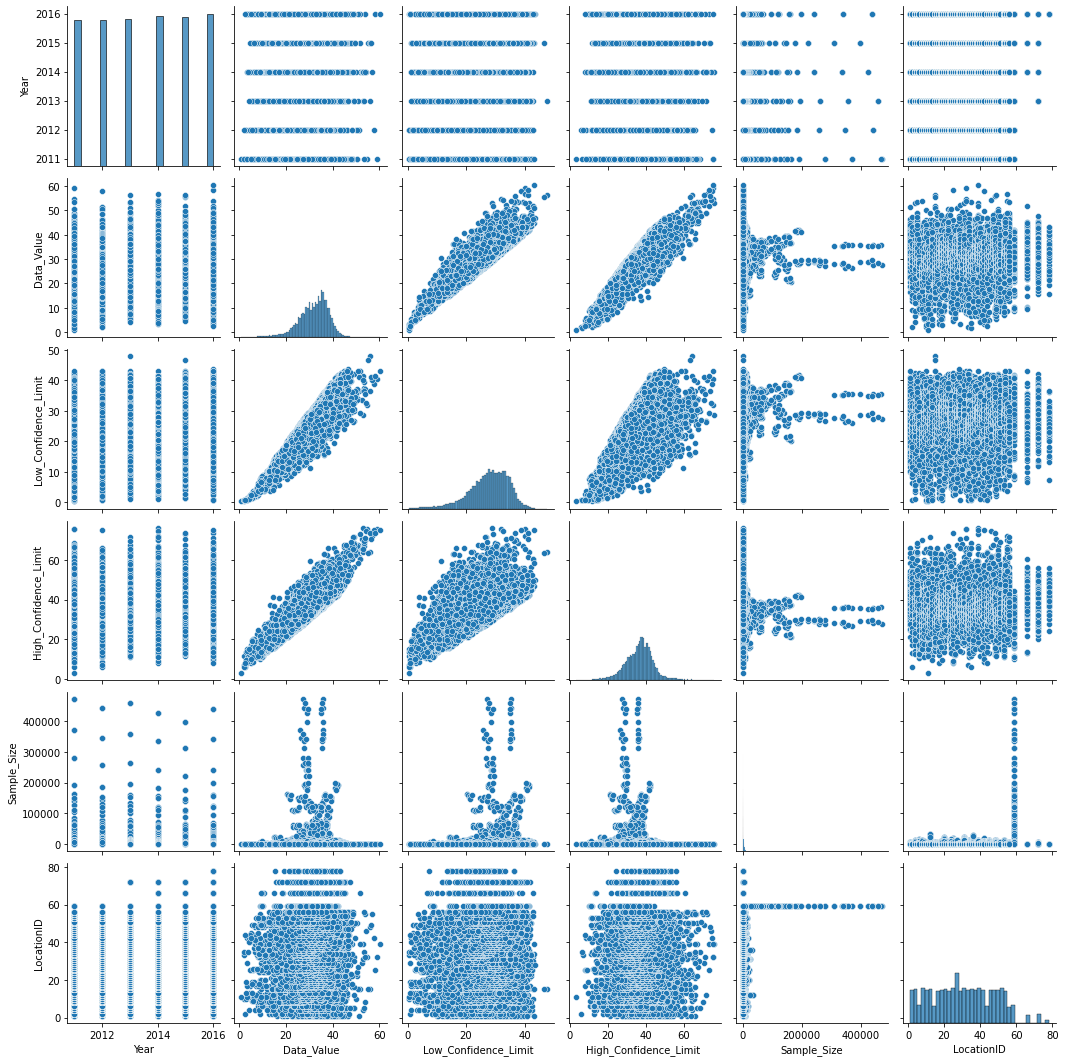

In [98]:
sns.pairplot(df)

In [99]:
df

,Year,Data_Value,Low_Confidence_Limit,High_Confidence_Limit,Sample_Size,QuestionID,LocationID,StratificationCategoryId1,StratificationID1
0,2011,32.0,30.5,33.5,7304.0,Q036,1,OVR,OVERALL
1,2011,32.3,29.9,34.7,2581.0,Q036,1,GEN,MALE
2,2011,31.8,30.0,33.6,4723.0,Q036,1,GEN,FEMALE
3,2011,33.6,29.9,37.6,1153.0,Q036,1,EDU,EDUHS
4,2011,32.8,30.2,35.6,2402.0,Q036,1,EDU,EDUHSGRAD
...,...,...,...,...,...,...,...,...,...
16249,2016,32.6,24.5,41.8,206.0,Q036,78,INC,INC75PLUS
16250,2016,31.8,20.1,46.2,106.0,Q036,78,INC,INCNR
16251,2016,21.3,13.3,32.3,148.0,Q036,78,RACE,RACEWHT
16252,2016,34.3,29.5,39.4,783.0,Q036,78,RACE,RACEBLK


In [100]:
df.QuestionID.value_counts()

Q036    8127
Q037    8127
Name: QuestionID, dtype: int64

In [101]:
df_copy.groupby('QuestionID').max()['Question'][['Q036','Q037']].values

C:\Users\ADMINP~1\AppData\Local\Temp/ipykernel_4140/1459281501.py:1: FutureWarning: Dropping invalid columns in DataFrameGroupBy.max is deprecated. In a future version, a TypeError will be raised. Before calling .max, select only columns which should be valid for the function.
  df_copy.groupby('QuestionID').max()['Question'][['Q036','Q037']].values


array(['Percent of adults aged 18 years and older who have obesity',
       'Percent of adults aged 18 years and older who have an overweight classification'],
      dtype=object)